# Lab: NLP

## Import Libraries and Data

In [71]:
import re
import string
import numpy as np

import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
import pandas as pd

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Activity: The above libraries are required for NLP. In your own words, explain the 'nltk' library. E.g.: What is the library about? what are the advantages of nltk in NLP etc.  

Write your answer here for above activity

# Preparing the data

Activity: Explain the dataset. Run the following code then include explanation below about the dataset.

In [72]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

## Prepare Dataframe and Create Label Column

In [73]:
all_tweets = all_positive_tweets + all_negative_tweets
df = pd.DataFrame(all_tweets, columns=['Tweet'])
labels = [1] * 5000 + [0] * 5000
df['Label'] = labels
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Tweet,Label
0,"I love you, how but you? @Taecyeon2pm8 did you...",0
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1
2,"Your love, O Lord, is better than life. :) &lt...",1
3,@yasminyasir96 yeah but it will be better if w...,1
4,Ok good night I wish troye wasn't ugly and I m...,1
...,...,...
9995,My nose and forehead are peeling :(,0
9996,@LittleMix come to Belgium :(,0
9997,WHY MUST THE VIDEO STOP THO :(,0
9998,@jeremygutsche we like this amazing donut reci...,1


## Using `df.info` check if there are any null rows in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   10000 non-null  object
 1   Label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


* Count the Labels column to see the distribution of the labels

<Axes: xlabel='Label'>

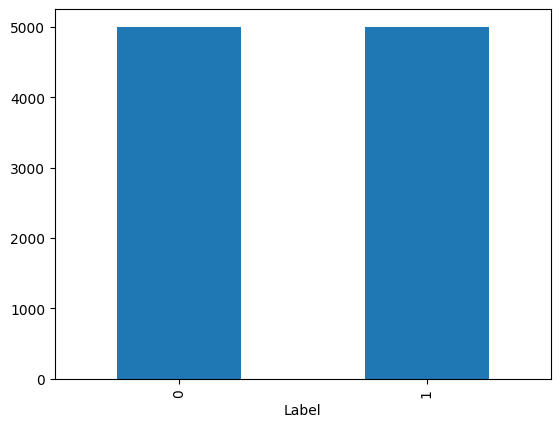

In [6]:
df['Label'].value_counts().plot(kind='bar')

# Activity One: Preprocessing the Textual Data

For the first activity you will be performing some text perprocessing using `re` and `nltk` library

#### 1. Create Function `clean_tweet` to Clean the Tweet and Apply to all rows in the Pandas Dataframe using `apply` and create new column `cleaned_tweet` and display the new dataframe.

In [1]:
def clean_tweet(tweet):

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    return tweet

In [74]:
#create new column cleaned_tweet

#Clean the Tweet and Apply to all rows in the Pandas Dataframe using apply

#display the new dataframe

# You also include comment to explain the code.
def clean_tweet(tweet):
    # Remove stock market tickers
    tweet = re.sub(r'\$\w*', '', tweet)

  # Remove retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

  # Remove hashtag symbol
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    tweet = re.sub(r'#', '', tweet)

    return tweet
# Apply the clean_tweet function
df['cleaned_tweet'] = df['Tweet'].apply(clean_tweet)

# Display
df.head()





,Tweet,Label,cleaned_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,"I love you, how but you? @Taecyeon2pm8 did you..."
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...
2,"Your love, O Lord, is better than life. :) &lt...",1,"Your love, O Lord, is better than life. :) &lt;3"
3,@yasminyasir96 yeah but it will be better if w...,1,@yasminyasir96 yeah but it will be better if w...
4,Ok good night I wish troye wasn't ugly and I m...,1,Ok good night I wish troye wasn't ugly and I m...


#### 2. Create `tweet_tokenizer` function and you will be tokenizing the Cleaned Tweet from above using `TweetTokenizer` from `nltk` library and apply to all cleaned rows in the dataframe and display the dataframe.

* Read the documentation [here](https://www.nltk.org/api/nltk.tokenize.casual.html?highlight=tweet#nltk.tokenize.casual.TweetTokenizer) and then proceed so that you can understand properly.

In [18]:
def tweet_tokenizer(tweet):
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens


In [75]:
#Tokenizing the Cleaned Tweet from above using TweetTokenizer from nltk library
#and apply to all cleaned rows in the dataframe


#display the dataframe
def tweet_tokenizer(tweet):

  # Tokenize the tweet text
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tokens = tokenizer.tokenize(tweet)
  return tokens

# Apply the tokenizer function
df['tokenized_tweet'] = df['cleaned_tweet'].apply(tweet_tokenizer)

# Display the  DataFrame
df.head()

,Tweet,Label,cleaned_tweet,tokenized_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,"I love you, how but you? @Taecyeon2pm8 did you...","[i, love, you, ,, how, but, you, ?, did, you, ..."
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,"[thanks, guys, :)]"
2,"Your love, O Lord, is better than life. :) &lt...",1,"Your love, O Lord, is better than life. :) &lt;3","[your, love, ,, o, lord, ,, is, better, than, ..."
3,@yasminyasir96 yeah but it will be better if w...,1,@yasminyasir96 yeah but it will be better if w...,"[yeah, but, it, will, be, better, if, we, use,..."
4,Ok good night I wish troye wasn't ugly and I m...,1,Ok good night I wish troye wasn't ugly and I m...,"[ok, good, night, i, wish, troye, wasn't, ugly..."


#### 3. create function `stopword_and_stemming`. In this function you will be removing `stopwords` and `stem` each word using `snowball stemmer` from `nltk` library

In [19]:
import string # to remove punctuations as well
from nltk.corpus import stopwords # Import stpwords from nltk
from nltk import SnowballStemmer # Import Stemmer from nltk

stopwords_english = stopwords.words('english')
stemmer = SnowballStemmer(language='english')

In [20]:
def stopword_and_stemming(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return " ".join(tweets_clean) # Join tweets back to get a single string

In [21]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(stopword_and_stemming)
df

,Tweet,Label,cleaned_tweet,tokenized_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,i l v e u h w b u u t e c e n 2 p ...,"[i, love, you, ,, how, but, you, ?, did, you, ..."
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,u u h l e e w n n l p 2 5 9 1 e e p h ...,"[thanks, guys, :)]"
2,"Your love, O Lord, is better than life. :) &lt...",1,y u r l v e o l r b e e r h n l ...,"[your, love, ,, o, lord, ,, is, better, than, ..."
3,@yasminyasir96 yeah but it will be better if w...,1,n r 9 6 e h b u w l l b e b e e r ...,"[yeah, but, it, will, be, better, if, we, use,..."
4,Ok good night I wish troye wasn't ugly and I m...,1,o k g n g h i w h r e w n u g l ...,"[ok, good, night, i, wish, troye, wasn't, ugly..."
...,...,...,...,...
9995,My nose and forehead are peeling :(,0,m n e n f r e h e r e p e e l n g,"[my, nose, and, forehead, are, peeling, :(]"
9996,@LittleMix come to Belgium :(,0,l l e m x c e b e l g u,"[come, to, belgium, :(]"
9997,WHY MUST THE VIDEO STOP THO :(,0,w h y m u s t t h e v i d e o s t o p ...,"[why, must, the, video, stop, tho, :(]"
9998,@jeremygutsche we like this amazing donut reci...,1,j e r e g u c h e w e l k e h z n g ...,"[we, like, this, amazing, donut, recipe, !, we..."


* Before Proceeding further into Analysis we have to split the data into `Train` and `Test`

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.4, random_state=37)

# Display the shapes of the resulting DataFrames
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Testing DataFrame shape: {test_df.shape}")

Training DataFrame shape: (6000, 4)
Testing DataFrame shape: (4000, 4)


# Activity Two: Bag of Words and TF-IDF

#### 1. Import `CountVectorizer` from `sklearn` libary and convert text to bag of words.

* Please go to documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to understand more about the arguments and what can be used for improving your feature engineering.
* ngram_rangetuple (min_n, max_n), default=(1, 1)
    * The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
* strip_accents{‘ascii’, ‘unicode’}, default=None
    * Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                   strip_accents='unicode')

In [77]:
X_train_cv = count_vectorizer.fit_transform(X_train)  # fit only on training data
X_valid_cv = count_vectorizer.transform(X_valid) # transform test/validation data

* Check the shapes of Training and Validation Data because most of the data will be sparse(mostly zeros) and check how both of the data have same number of columns which are features as well for training the model.

In [78]:
print("Train Shape -", X_train_cv.shape)
print("Valadiation Shape -", X_valid_cv.shape)

Train Shape - (6000, 20)
Valadiation Shape - (4000, 20)


* Display the vocabulary from `count_vectorizer` instance and check the unigram and bigram frequencies.

In [79]:
count_vectorizer.vocabulary_

{'다': 2,
 '쇼': 6,
 '다 쇼': 3,
 '에': 7,
 '이': 9,
 '핑': 18,
 '크': 13,
 '더': 4,
 '에 이': 8,
 '이 핑': 10,
 '핑 크': 19,
 '크 더': 14,
 '더 쇼': 5,
 '인': 11,
 '피': 16,
 '니': 0,
 '트': 15,
 '인 피': 12,
 '피 니': 17,
 '니 트': 1}

#### 2. Import `TfidfVectorizer` from `sklearn` libary and convert text to TFIDF Vectors.

* Please go to documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to understand more about the arguments and what can be used for improving your feature engineering.
* ngram_rangetuple (min_n, max_n), default=(1, 1)
    * The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
* strip_accents{‘ascii’, ‘unicode’}, default=None
    * Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                   strip_accents='unicode')



In [58]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # fit only on training data
X_valid_tfidf = tfidf_vectorizer.transform(X_valid) # transform test/validation data

* Check the shapes of Training and Validation Data because most of the data will be sparse(mostly zeros) and check how both of the data have same number of columns which are features as well for training the model.

In [59]:
print("Train Shape -", X_train_tfidf.shape)
print("Valadiation Shape -", X_valid_tfidf.shape)

Train Shape - (6000, 20)
Valadiation Shape - (4000, 20)


#### Activity Three: Sentiment Classification Using Logistic Regression
* Also you can train any model of your choice once you have the features built from above two methods.

#### 1. Import `LogisticRegression` from `sklearn` library

In [43]:
from sklearn.linear_model import LogisticRegression

#### 2. Train Logistic Regresion using Count Vectorizer or Bag of Words features.
* Predict Validation Data
* Print Classification Report using `from sklearn.metrics import classification_report` library

In [65]:
# Import required libraries
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.metrics import classification_report  # Evaluation metric for classification

# the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=37)


In [80]:
# Train the model using Bag of Words
log_reg.fit(X_train_cv, y_train)

# prediction of validation data
y_pred_cv = log_reg.predict(X_valid_cv)

# print classification report in it
print("Classification Report for Logistic Regression using Bag of Words:")
print(classification_report(y_valid, y_pred_cv))

Classification Report for Logistic Regression using Bag of Words:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1974
           1       0.00      0.00      0.00      2026

    accuracy                           0.49      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.24      0.49      0.33      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 3. Train Logistic Regresion using TFIDF Vectorizer.
* Predict Validation Data
* Print Classification Report using `from sklearn.metrics import classification_report` library

In [85]:
# Import required libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import classification_report    # Metric for evaluating classification performance

# Initialize the Logistic Regression model with specified parameters
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=37)  # Set max iterations and random seed


log_reg_tfidf.fit(X_train_tfidf, y_train)  # Fit model to training data


y_pred_tfidf = log_reg_tfidf.predict(X_valid_tfidf)  # Generate predictions on validation data


print("Classification Report for Logistic Regression using TF-IDF:")
print(classification_report(y_valid, y_pred_tfidf))  # Output precision, recall, F1-score, and support

Classification Report for Logistic Regression using TF-IDF:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1974
           1       0.00      0.00      0.00      2026

    accuracy                           0.49      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.24      0.49      0.33      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4.Inference on new data point from anyone of the model using countvectorizer or tfidf

In [82]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
my_tweet = clean_tweet(my_tweet)  # clean the text
my_tweet = tweet_tokenizer(my_tweet) # tokenize the text
my_tweet = stopword_and_stemming(my_tweet) # remove stopwords and stem each word
print(my_tweet)
my_tweet_vec = tfidf_vectorizer.transform([my_tweet])



y_hat = lr_tfidf.predict_proba(my_tweet_vec)
print(y_hat[0][0])
if y_hat[0][0] > 0.5:
    print('Negative sentiment')
else:
    print('Positive sentiment')

ridicul bright movi plot terribl sad end


NameError: name 'lr_tfidf' is not defined

In [84]:
# Feel free to change the tweet below
my_tweet = 'I am good at what I am doing.'
my_tweet = clean_tweet(my_tweet)  # clean the text
my_tweet = tweet_tokenizer(my_tweet) # tokenize the text
my_tweet = stopword_and_stemming(my_tweet) # remove stopwords and stem each word
print(my_tweet)
my_tweet_vec = tfidf_vectorizer.transform([my_tweet])



y_hat = lr_tfidf.predict_proba(my_tweet_vec)
print(y_hat[0][1])
if y_hat[0][0] > 0.5:
    print('Negative sentiment')
else:
    print('Positive sentiment')

good


NameError: name 'lr_tfidf' is not defined